# Lorenzo Pastore - Big Data in GIS (Task 3)
Matricola: 847212

- Compare multi-model ensemble mean annual time series with GMTA (HadCRUT4) observational time series since 1901

In [2]:
#Import libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import pandas as pd

#### Load model 1

In [3]:
#Choice of file (model)
modfile='BigDatainGIS1920_Module3_datasets/ts_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc'

#Extract model name
m_variable='BigDatainGIS1920_Module3_datasets/ts_Amon_'
m_case='_historical_r1i1p1f1_gr_185001-201412.nc'
model=modfile[len(m_variable):-len(m_case)]

#Open file
d1d = xr.open_dataset(modfile)

#Extract variable (ts)
ts = d1d.ts

#### Load model 2

In [4]:
#Extract model name
modfile2='BigDatainGIS1920_Module3_datasets/ts_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc'

#Extract model name
m_variable='BigDatainGIS1920_Module3_datasets/ts_Amon_'
m_case='_historical_r1i1p1f1_gr_185001-201412.nc'
model2=modfile2[len(m_variable):-len(m_case)]

#Open file
m2 = xr.open_dataset(modfile2)

#Extract variable (ts)
ts2 = m2.ts

#Apply regridding on model 1 coords
ts2i = ts2.interp(lat=ts.lat, lon=ts.lon, method='linear')

#### Load model 3

In [5]:
#- extract model name
modfile3='BigDatainGIS1920_Module3_datasets/ts_Amon_MIROC6_historical_r1i1p1f1_gn_185001-201412.nc'

#Extract model name
m_variable='BigDatainGIS1920_Module3_datasets/ts_Amon_'
m_case='_historical_r1i1p1f1_gr_185001-201412.nc'
model3=modfile3[len(m_variable):-len(m_case)]

#Open file
m3 = xr.open_dataset(modfile3)

#Extract variable (ts)
ts3 = m3.ts  

#Apply regridding
ts3i = ts3.interp(lat=ts.lat, lon=ts.lon, method='linear')

#### Multi-model ensemble calculation

In [6]:
#Model 1-2-3 Year mean calculation and convertion in Celtius

tsy_mean= ts.loc['1961':'1990'].mean()
tsy = (ts.groupby('time.year').mean(dim=('time','lon','lat'))-tsy_mean)#-273.15
tsy = tsy.loc['1901':'2014']

ts2iy_mean= ts2i.loc['1961':'1990'].mean()
ts2iy = (ts2i.groupby('time.year').mean(dim=('time','lon','lat'))-ts2iy_mean)#-273.15
ts2iy = ts2iy.loc['1901':'2014']

ts3iy_mean= ts3i.loc['1961':'1990'].mean()
ts3iy = (ts3i.groupby('time.year').mean(dim=('time','lon','lat'))-ts3iy_mean)#-273.15
ts3iy = ts3iy.loc['1901':'2014']

#Ensemble mean calculation

ens_mean = np.nanmean([tsy,ts2iy,ts3iy],axis=0)
print(np.shape(ens_mean))

(114,)


# Task 3
Compare multi-model ensemble mean annual time series with GMTA (HadCRUT4) observational time series since 1901

In [21]:
#Import the HadCrut4 dataset
hadcrut4 = pd.read_csv('HadCRUT4.txt', sep='\s+', header=None, names=('time','temp'))

#Time series df creation
hadcrut4['time'] = pd.date_range('1850','2021',freq='Y')
hadcrut4 = hadcrut4.set_index(['time'])

hadcrut4_mean= hadcrut4.loc['1961':'1990'].mean()

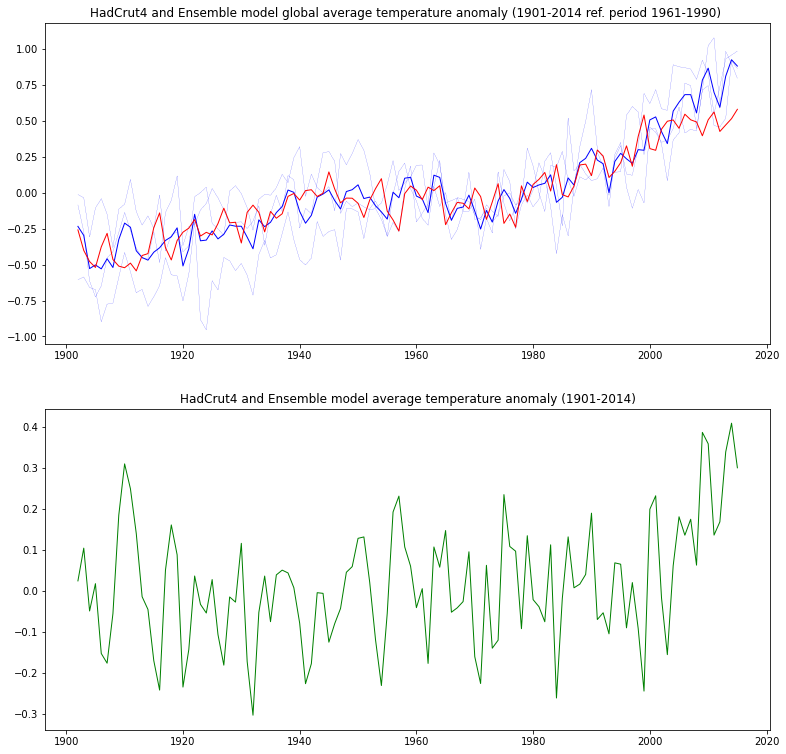

In [32]:
# Prepare to display to check things

fig = plt.figure(figsize=(13,13))
#subplots = (2,3)
grid = plt.GridSpec(2,1)

tser = fig.add_subplot(grid[0,:])

tser.set_title('HadCrut4 and Ensemble model global average temperature anomaly (1901-2014 ref. period 1961-1990) ')
plt.plot(pd.date_range('1901','2015', freq='Y'),tsy,color='blue',linewidth=0.2,linestyle='--')
plt.plot(pd.date_range('1901','2015', freq='Y'),ts2iy,color='blue',linewidth=0.2,linestyle='--')
plt.plot(pd.date_range('1901','2015', freq='Y'),ts3iy,color='blue',linewidth=0.2,linestyle='--')

plt.plot(pd.date_range('1901','2015', freq='Y'),ens_mean,color='blue',linewidth=1)
plt.plot(pd.date_range('1901','2015', freq='Y'),hadcrut4['1901':'2014'],color='red',linewidth=1)

anom = fig.add_subplot(grid[1,:])
anom.set_title('HadCrut4 and Ensemble model average temperature anomaly (1901-2014)')
plt.plot(pd.date_range('1901','2015', freq='Y'),ens_mean - hadcrut4['temp']['1901':'2014'],color='green',linewidth=1)

plt.show()